In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 


In [3]:
cd= pd.read_csv("D://assignments//Assignment 14//Fraud_check.csv")
cd.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [28]:
df2 = cd.rename(columns = {'Taxable.Income': 'income'}, inplace = False)

(array([57., 53., 75., 58., 56., 59., 64., 53., 52., 73.]),
 array([10003. , 18964.6, 27926.2, 36887.8, 45849.4, 54811. , 63772.6,
        72734.2, 81695.8, 90657.4, 99619. ]),
 <BarContainer object of 10 artists>)

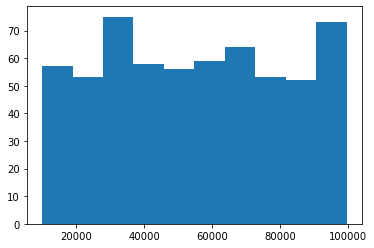

In [30]:
plt.hist(df2['income']) 

In [4]:
label_encoder = preprocessing.LabelEncoder()
cd['Undergrad']= label_encoder.fit_transform(cd['Undergrad']) 
cd['Urban']= label_encoder.fit_transform(cd['Urban'])
cd['Marital.Status']= label_encoder.fit_transform(cd['Marital.Status'])

In [5]:
cd.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [6]:
df=cd

In [7]:
def func(x):
    if  x <= 30000:
        return 'Risky'
    else :
        return 'Good'

In [8]:
df['Taxable_income'] = df['Taxable.Income'].apply(func)


In [9]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_income
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [10]:
df['Taxable_income']= label_encoder.fit_transform(df['Taxable_income'])

In [11]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [12]:
df_norm = norm_func(df)


In [13]:
df_norm.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_income
0,0.0,1.0,0.656468,0.139472,0.333333,1.0,0.0
1,1.0,0.0,0.264428,0.622394,0.600000,1.0,0.0
2,0.0,0.5,0.300415,0.772568,1.000000,1.0,0.0
3,1.0,1.0,0.448436,0.962563,0.500000,1.0,0.0
4,0.0,0.5,0.792258,0.010081,0.933333,0.0,0.0


In [14]:
df_norm[df_norm.duplicated()].shape

(0, 7)

In [15]:
df_norm.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
Taxable_income     0
dtype: int64

In [16]:
df = df.drop('Taxable.Income', 1)


In [17]:
df_norm.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_income
0,0.0,1.0,0.656468,0.139472,0.333333,1.0,0.0
1,1.0,0.0,0.264428,0.622394,0.600000,1.0,0.0
2,0.0,0.5,0.300415,0.772568,1.000000,1.0,0.0
3,1.0,1.0,0.448436,0.962563,0.500000,1.0,0.0
4,0.0,0.5,0.792258,0.010081,0.933333,0.0,0.0


In [18]:
x=df_norm.iloc[:,:5]
y=df_norm['Taxable_income']

In [19]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience
0,0.0,1.0,0.656468,0.139472,0.333333
1,1.0,0.0,0.264428,0.622394,0.600000
2,0.0,0.5,0.300415,0.772568,1.000000
3,1.0,1.0,0.448436,0.962563,0.500000
4,0.0,0.5,0.792258,0.010081,0.933333
...,...,...,...,...,...
595,1.0,0.0,0.740236,0.078811,0.233333
596,1.0,0.0,0.669122,0.170058,0.066667
597,0.0,0.0,0.416566,0.737240,0.000000
598,1.0,0.5,0.988540,0.886810,0.566667


In [20]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
595    0.0
596    0.0
597    0.0
598    0.0
599    0.0
Name: Taxable_income, Length: 600, dtype: float64

In [21]:
df_norm.Taxable_income.value_counts()

0.0    476
1.0    124
Name: Taxable_income, dtype: int64

In [22]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40)

In [23]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [24]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

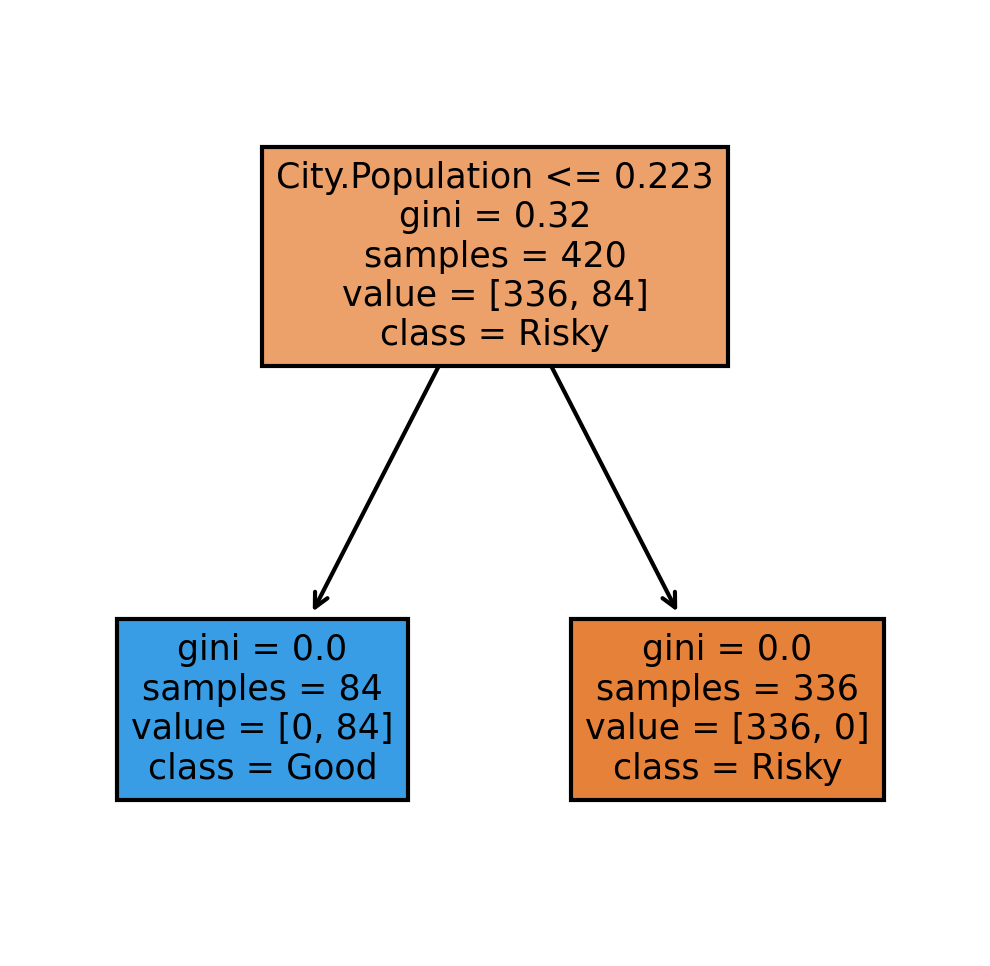

In [26]:
fn=['Undergrad','Marital.Status	','City.Population','Work.Experience','Urban']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [75]:
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.7777777777777778